## Budget Equation

We begin with the general **budget equation** for a scalar quantity $q$, which describes its evolution in time and space due to advection and external sources:

- **Full form**:
$$
\frac{\partial q}{\partial t} + \nabla \cdot (\vec{u}q) = F
$$

Here, $\vec{u}$ is the velocity vector, and $F$ represents external sources or sinks.

Now we neglecting sources/sinks and assuming Boussinesq fluids, this equation simplifies to:

- **Simplified form**:
$$
\frac{\partial q}{\partial t} + u \frac{\partial q}{\partial x} + v \frac{\partial q}{\partial y} + \omega \frac{\partial q}{\partial p}= 0
$$

---

## Zonal Mean Operator

We define the **zonal mean operator** as an average over the longitudinal ($x$) direction:

$$
\overline{(\cdot)} = \frac{1}{L_x} \int_0^{L_x} (\cdot) \, dx
$$

Applying this operator to the simplified budget equation yields:

$$
\frac{\partial \overline{q}}{\partial t} + \overline{u \frac{\partial q}{\partial x}} + \overline{v \frac{\partial q}{\partial y}} + \overline{\omega \frac{\partial q}{\partial p}} = 0
$$

This expression represents the zonally averaged evolution of $q$, incorporating contributions from the full (nonlinear) flow field.

---

## Reynolds Decomposition

To distinguish between large-scale mean flows and smaller-scale fluctuations, we apply **Reynolds decomposition** to each variable:

$$
u = \overline{u} + u', \quad v = \overline{v} + v', \quad \omega = \overline{\omega} + \omega', \quad q = \overline{q} + q'
$$

Substituting these into the zonally averaged budget equation introduces a variety of terms involving both mean and fluctuating components. However, under the properties of the zonal mean, **cross terms between mean and eddy components vanish** (proof omitted). What remains are terms involving only mean–mean and eddy–eddy interactions:

$$
\frac{\partial \overline{q}}{\partial t} + \overline{u' \frac{\partial q'}{\partial x}} + \overline{v} \frac{\partial \overline{q}}{\partial y} + \overline{v' \frac{\partial q'}{\partial y}} + \overline{\omega} \frac{\partial \overline{q}}{\partial p} + \overline{\omega' \frac{\partial q'}{\partial p}} = 0
$$

This form provides a foundation for analyzing the respective roles of mean circulation and eddy fluxes.

---

## Focused Eddy Contribution (Meridional)

To isolate the role of **eddy fluxes in the meridional direction** (i.e., in $y$), we neglect the contributions from mean terms and the other spatial directions. The resulting simplified equation is:

$$
\frac{\partial \overline{q}}{\partial t} = - \overline{v' \frac{\partial q'}{\partial y}}
$$

This term represents the effect of eddies transporting $q$ in the meridional direction.

---

## Spectral Representation of Eddy Terms

To analyze the eddy term in more detail, we express the eddy components as **Fourier series** in the zonal direction:

- Eddy velocity:
  $$
  v' = \sum_k \hat{v'}_k e^{ikx}
  $$
- Eddy gradient:
  $$
  \frac{\partial q'}{\partial y} = \sum_k \widehat{\left(\frac{\partial q'}{\partial y}\right)}_k e^{ikx}
  $$

The zonal mean of their product becomes:

$$
\overline{v' \frac{\partial q'}{\partial y}} = \sum_{k_1} \sum_{k_2} \hat{v'}_{k_1} \widehat{\left(\frac{\partial q'}{\partial y}\right)}_{k_2} \, \overline{e^{i(k_1 + k_2)x}}
$$

To evaluate the zonal mean of this product, we use the **orthogonality property of complex exponentials** over a periodic domain. Specifically, for a function defined over a zonal domain of length $L_x$, the zonal mean of the exponential $e^{ikx}$ is zero unless the wavenumber $k = 0$. This stems from the fact that complex exponentials with different total wavenumbers are orthogonal when integrated over a full wavelength. Thus:

- If $k_1 + k_2 \neq 0$, then $\overline{e^{i(k_1 + k_2)x}} = 0$
- If $k_1 + k_2 = 0$, then $\overline{e^{i(k_1 + k_2)x}} = 1$

Therefore, only terms with opposite wavenumbers survive in the sum:

$$
\overline{v' \frac{\partial q'}{\partial y}} = \sum_{\substack{k_1, k_2 \\ k_1 + k_2 = 0}} \hat{v'}_{k_1} \widehat{\left(\frac{\partial q'}{\partial y}\right)}_{k_2}
$$

Substituting back into the time tendency of the zonal mean, we obtain:

$$
\frac{\partial \overline{q}}{\partial t} = - \sum_{\substack{k_1, k_2 \\ k_1 + k_2 = 0}} \hat{v'}_{k_1} \widehat{\left(\frac{\partial q'}{\partial y}\right)}_{k_2}
$$

This expression highlights how the **nonlinear interactions of eddy components** with opposite wavenumbers contribute to the zonal mean evolution of $q$.

---
In this demo, I will verify that, under zonal averaging, for **real-value** functions
- Eddy contributions from different wavenumbers cancel out.
- Eddy contributions from same wavenumbers contribute to the budget.
- The total eddy contributions can thus be viewed as the sum of individual eddy–eddy interactions at each wavenumber.
---

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def display_eddy_structure(
    velocity_wavenumber: int = 1, quantity_gradient_wavenumber: int = 1
) -> None:
    """
    Visualize the structure and spectral representation of eddy fluxes formed by
    the interaction between a velocity anomaly and a gradient quantity anomaly.

    Parameters:
        velocity_wavenumber (int): Wavenumber for the velocity perturbation v′. Must be a positive integer.
        quantity_gradient_wavenumber (int): Wavenumber for the quantity gradient ∂q′/∂y. Must be a positive integer.
        show_plot (bool): If True, displays the generated plots.

    Returns:
        None
    """
    if (
        not isinstance(velocity_wavenumber, int)
        or not isinstance(quantity_gradient_wavenumber, int)
        or velocity_wavenumber <= 0
        or quantity_gradient_wavenumber <= 0
    ):
        raise ValueError(
            "velocity_wavenumber and quantity_gradient_wavenumber must be positive integers."
        )

    coordinate = np.linspace(0, 1, 1000, endpoint=False)
    freqencies = np.fft.fftfreq(len(coordinate), d=coordinate[1] - coordinate[0])

    v_prime = np.sin(2 * np.pi * velocity_wavenumber * coordinate)
    dqdy_prime = np.sin(2 * np.pi * quantity_gradient_wavenumber * coordinate)
    eddy_flux = v_prime * dqdy_prime

    v_spectrum = np.abs(np.fft.fft(v_prime, norm="ortho")) ** 2
    dqdy_spectrum = np.abs(np.fft.fft(dqdy_prime, norm="ortho")) ** 2
    eddy_spectrum = np.abs(np.fft.fft(eddy_flux, norm="ortho")) ** 2

    fig, axes = plt.subplots(
        nrows=2, ncols=2, figsize=(16, 9), dpi=160, sharex="col", sharey="col"
    )

    axes[0, 0].plot(
        coordinate, v_prime, label="$v′$", color="tab:red", linestyle="-", linewidth=2
    )
    axes[0, 0].plot(
        coordinate,
        dqdy_prime,
        label=r"$\frac{\partial q′}{\partial y}$",
        color="tab:blue",
        linestyle="--",
        linewidth=2,
    )
    axes[0, 0].plot(
        coordinate,
        np.zeros_like(coordinate),
        color="black",
        linestyle="--",
        linewidth=1,
        zorder=-1,
    )
    axes[0, 0].set_title(
        r"Individual Eddy Structure: $v′$ and $\frac{\partial q′}{\partial y}$"
    )
    axes[0, 0].set_ylabel("Amplitude")
    axes[0, 0].legend(loc=1)

    axes[0, 1].bar(
        freqencies, v_spectrum, label=r"$|v′|^2$", color="tab:red", width=0.4
    )
    axes[0, 1].bar(
        freqencies,
        dqdy_spectrum,
        label=r"$\left|\frac{\partial q′}{\partial y}\right|^2$",
        color="tab:blue",
        width=0.4,
        alpha=0.5,
    )
    axes[0, 1].set_title(r"Spectrum: $v′$ and $\frac{\partial q′}{\partial y}$")
    axes[0, 1].set_xlim(-10, 10)
    axes[0, 1].set_xticks(np.arange(-10, 11, 1))
    axes[0, 1].legend(loc=1)

    axes[1, 0].plot(
        coordinate,
        eddy_flux,
        label=r"$v′ \frac{\partial q′}{\partial y}$",
        color="black",
        linewidth=2,
    )
    axes[1, 0].fill_between(
        coordinate,
        0,
        eddy_flux,
        where=eddy_flux > 0,
        facecolor="red",
        interpolate=True,
        alpha=0.5,
    )
    axes[1, 0].fill_between(
        coordinate,
        0,
        eddy_flux,
        where=eddy_flux < 0,
        facecolor="blue",
        interpolate=True,
        alpha=0.5,
    )
    axes[1, 0].plot(
        coordinate,
        np.zeros_like(coordinate),
        color="black",
        linestyle="--",
        linewidth=1,
        zorder=-1,
    )
    axes[1, 0].set_title(r"Eddy Interaction: $v′\frac{\partial q′}{\partial y}$")
    axes[1, 0].set_xlabel("Normalized Coordinate")
    axes[1, 0].set_ylabel("Amplitude")
    axes[1, 0].legend(loc=1)

    axes[1, 1].bar(
        freqencies,
        eddy_spectrum,
        label=r"$|v′ \frac{\partial q′}{\partial y}|^2$",
        color="black",
        width=0.4,
    )
    axes[1, 1].set_title(r"Spectrum: $v′\frac{\partial q′}{\partial y}$")
    axes[1, 1].set_xlabel("Wavenumber")
    axes[1, 1].set_xlim(-10, 10)
    axes[1, 1].set_xticks(np.arange(-10, 11, 1))
    axes[1, 1].legend(loc=1)

    fig.suptitle(
        r"$v′$ wavenumber: "
        + f"{velocity_wavenumber}\n"
        + r"$\frac{{\partial q′}}{{\partial y}}$ wavenumber: "
        + f"{quantity_gradient_wavenumber}\n"
        + r"$\overline{v′\frac{\partial q′}{\partial y}}$: "
        + f"{np.round(np.mean(eddy_flux), 3)} (units)"
    )
    plt.tight_layout()
    plt.show()

    return None


def display_eddy_contribution_under_zonal_mean(
    velocity_wavenumber: int = 2, quantity_gradient_wavenumber: int = 2
) -> None:
    """
    Decompose eddy flux into contributions from individual wavenumbers
    by filtering velocity and gradient fields using Fourier methods.

    Parameters:
        velocity_wavenumber (int): Wavenumber of the velocity anomaly v′.
        quantity_gradient_wavenumber (int): Wavenumber of the quantity gradient anomaly ∂q′/∂y.

    Returns:
        None
    """

    def _compute_eddy_component(
        velocity: np.ndarray, quantity_gradient: np.ndarray, mask: np.ndarray
    ):
        """
        Compute the contribution to the eddy flux from a specific wavenumber.

        Parameters:
            velocity (np.ndarray): velocity field (e.g., velocity anomaly).
            quantity_gradient (np.ndarray): quantity field (e.g., quantity gradient anomaly).
            mask (np.ndarray): Boolean mask for selecting a single wavenumber in frequency space.

        Returns:
            np.ndarray: Eddy flux component for the masked wavenumber.
        """
        p_tmp = np.fft.irfft(np.fft.rfft(velocity) * mask, n=velocity.size)
        q_tmp = np.fft.irfft(
            np.fft.rfft(quantity_gradient) * mask, n=quantity_gradient.size
        )
        eddy_component = p_tmp * q_tmp
        return eddy_component

    coordinate = np.linspace(0, 1, 1000, endpoint=False)

    v_prime = 10 * np.sin(
        2 * np.pi * velocity_wavenumber * coordinate
    ) + 1e-2 * np.random.randn(coordinate.size)
    dqdy_prime = 10 * np.sin(
        2 * np.pi * quantity_gradient_wavenumber * coordinate
    ) + 1e-2 * np.random.randn(coordinate.size)
    eddy_flux = v_prime * dqdy_prime

    total_eddy_contribution = np.zeros_like(coordinate, dtype=float)

    for wn in np.fft.rfftfreq(n=coordinate.size, d=1 / coordinate.size):
        wavenumber_mask = (
            np.fft.rfftfreq(n=coordinate.size, d=1 / coordinate.size) == wn
        )
        total_eddy_contribution += _compute_eddy_component(
            v_prime, dqdy_prime, wavenumber_mask
        )

    print(
        f"Sum of individual eddy contributions : {np.mean(total_eddy_contribution):.1f}"
    )
    print(f"Total eddy contributions : {np.mean(eddy_flux):.1f}")
    return None

Sum of individual eddy contributions : -0.0
Total eddy contributions : -0.0


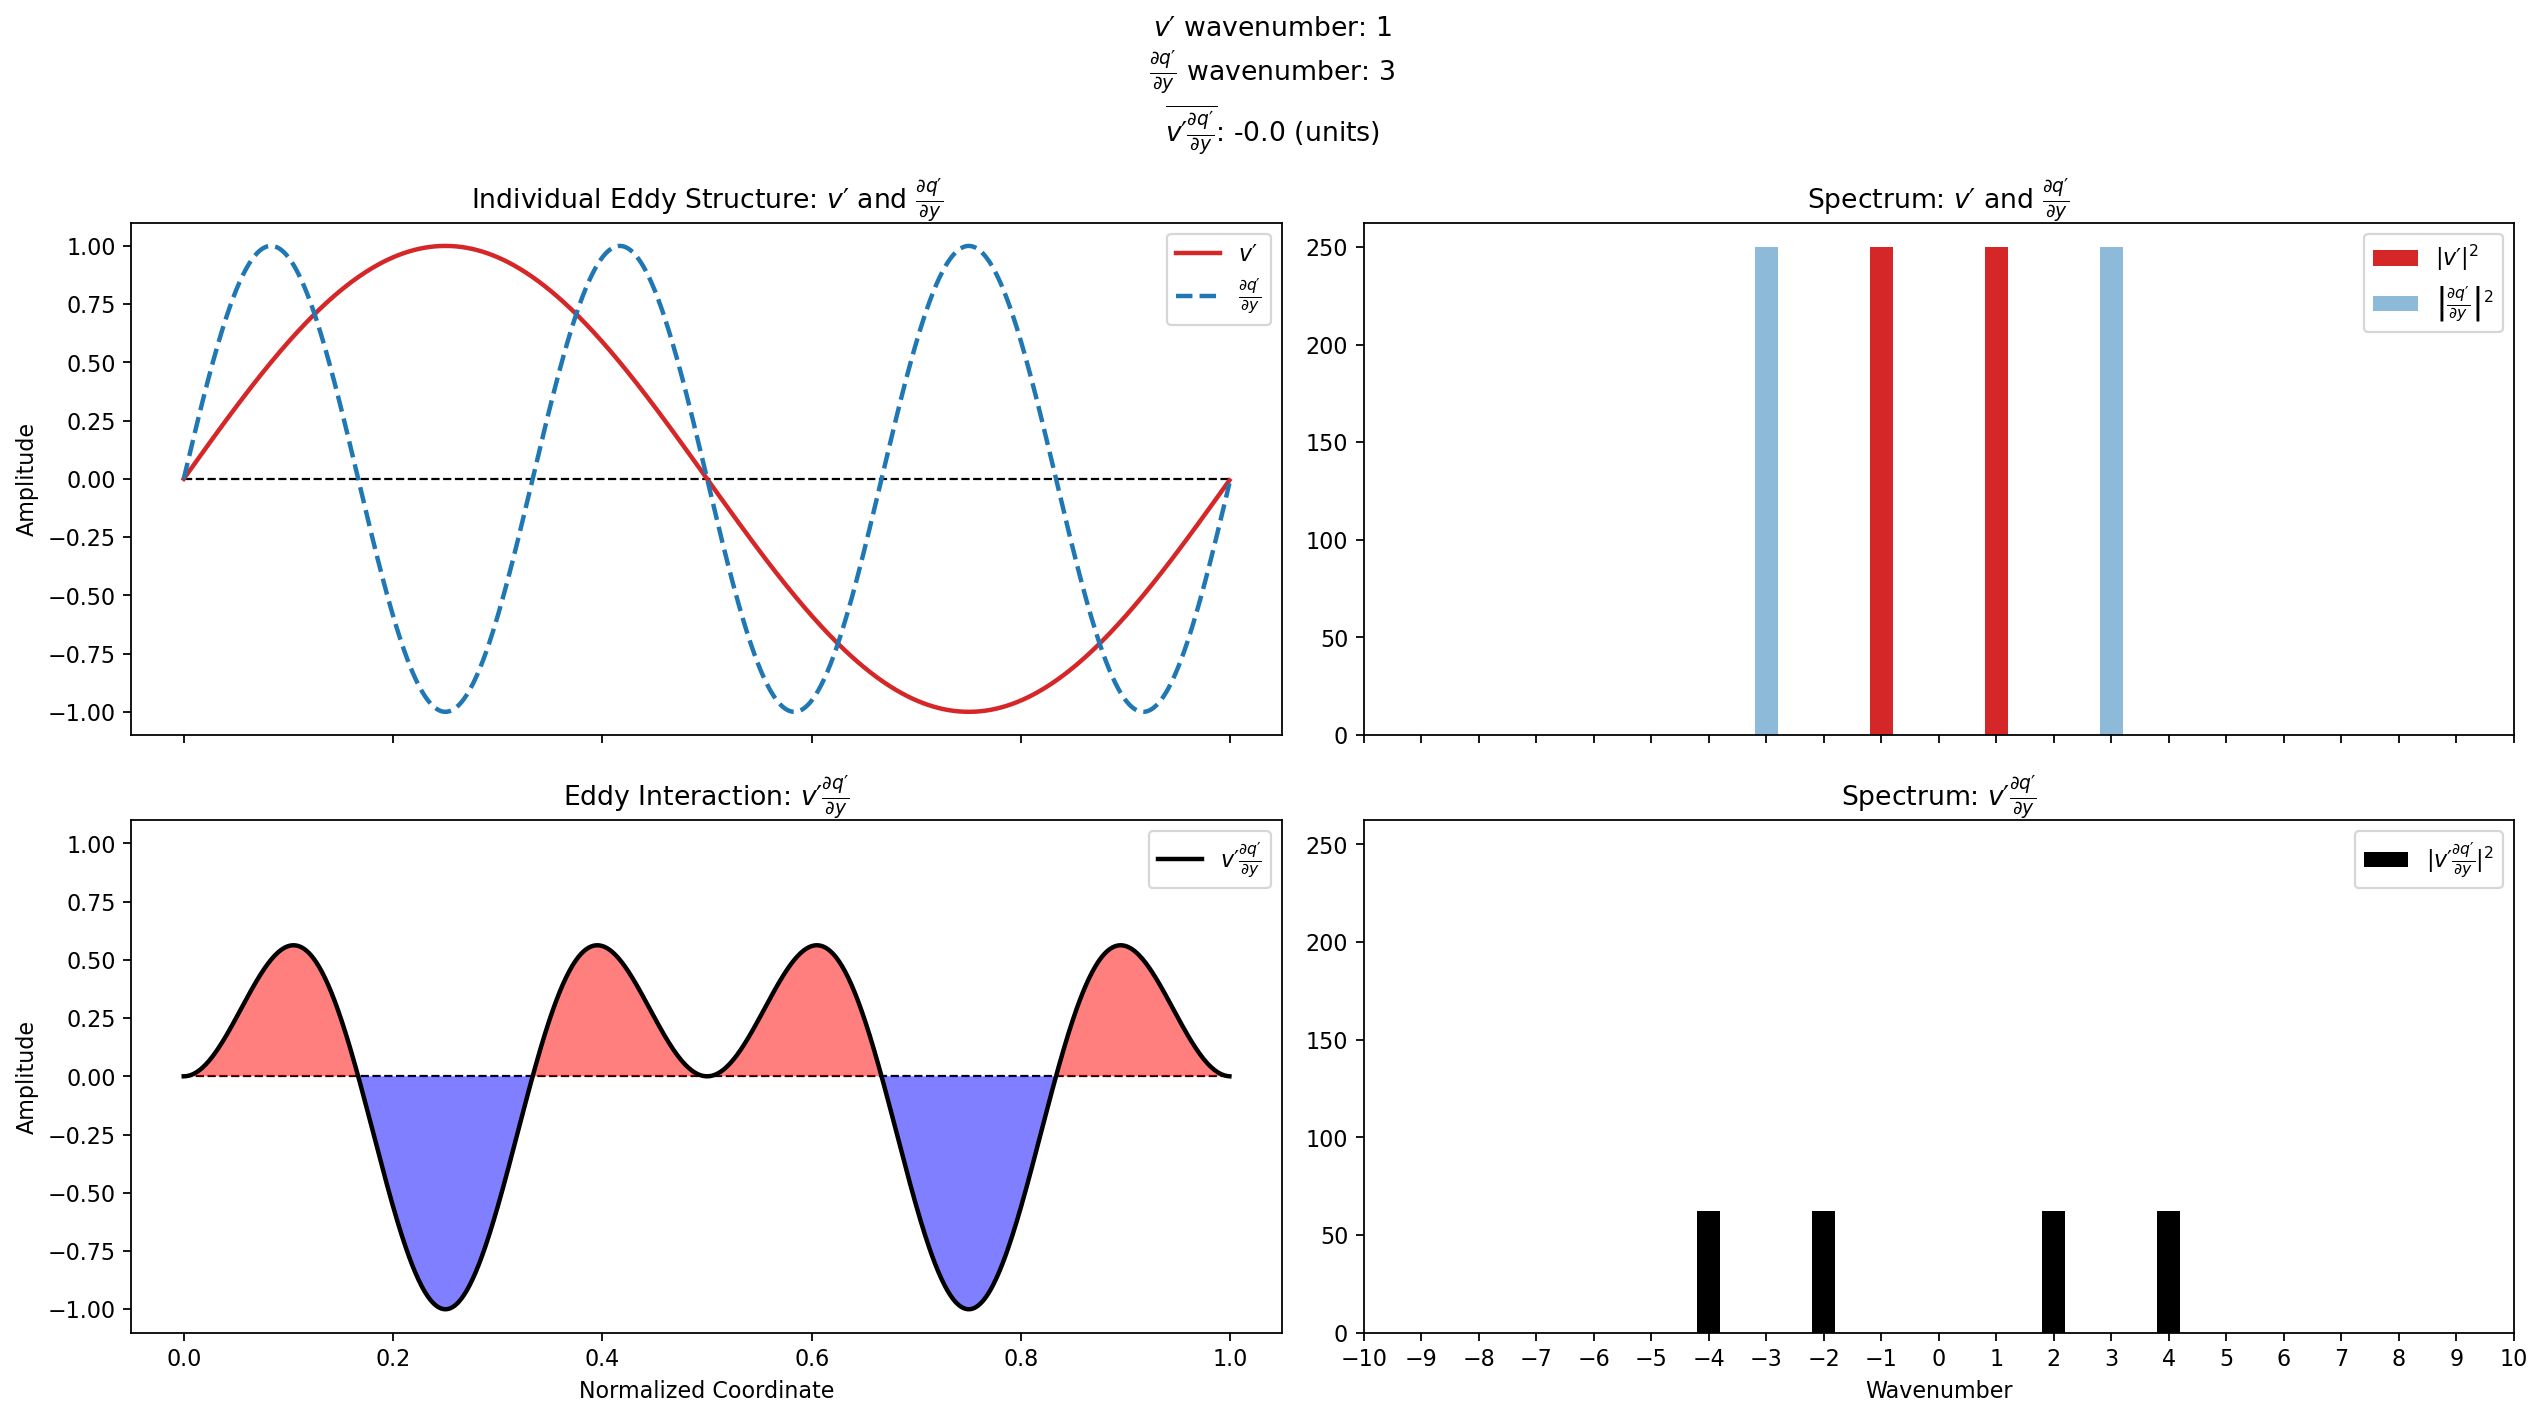

In [13]:
# Eddy contributions from different wavenumbers cancel out.
k1 = 1
k2 = 3
display_eddy_contribution_under_zonal_mean(
    velocity_wavenumber=k1, quantity_gradient_wavenumber=k2
)
display_eddy_structure(velocity_wavenumber=k1, quantity_gradient_wavenumber=k2)

Sum of individual eddy contributions : 50.0
Total eddy contributions : 50.0


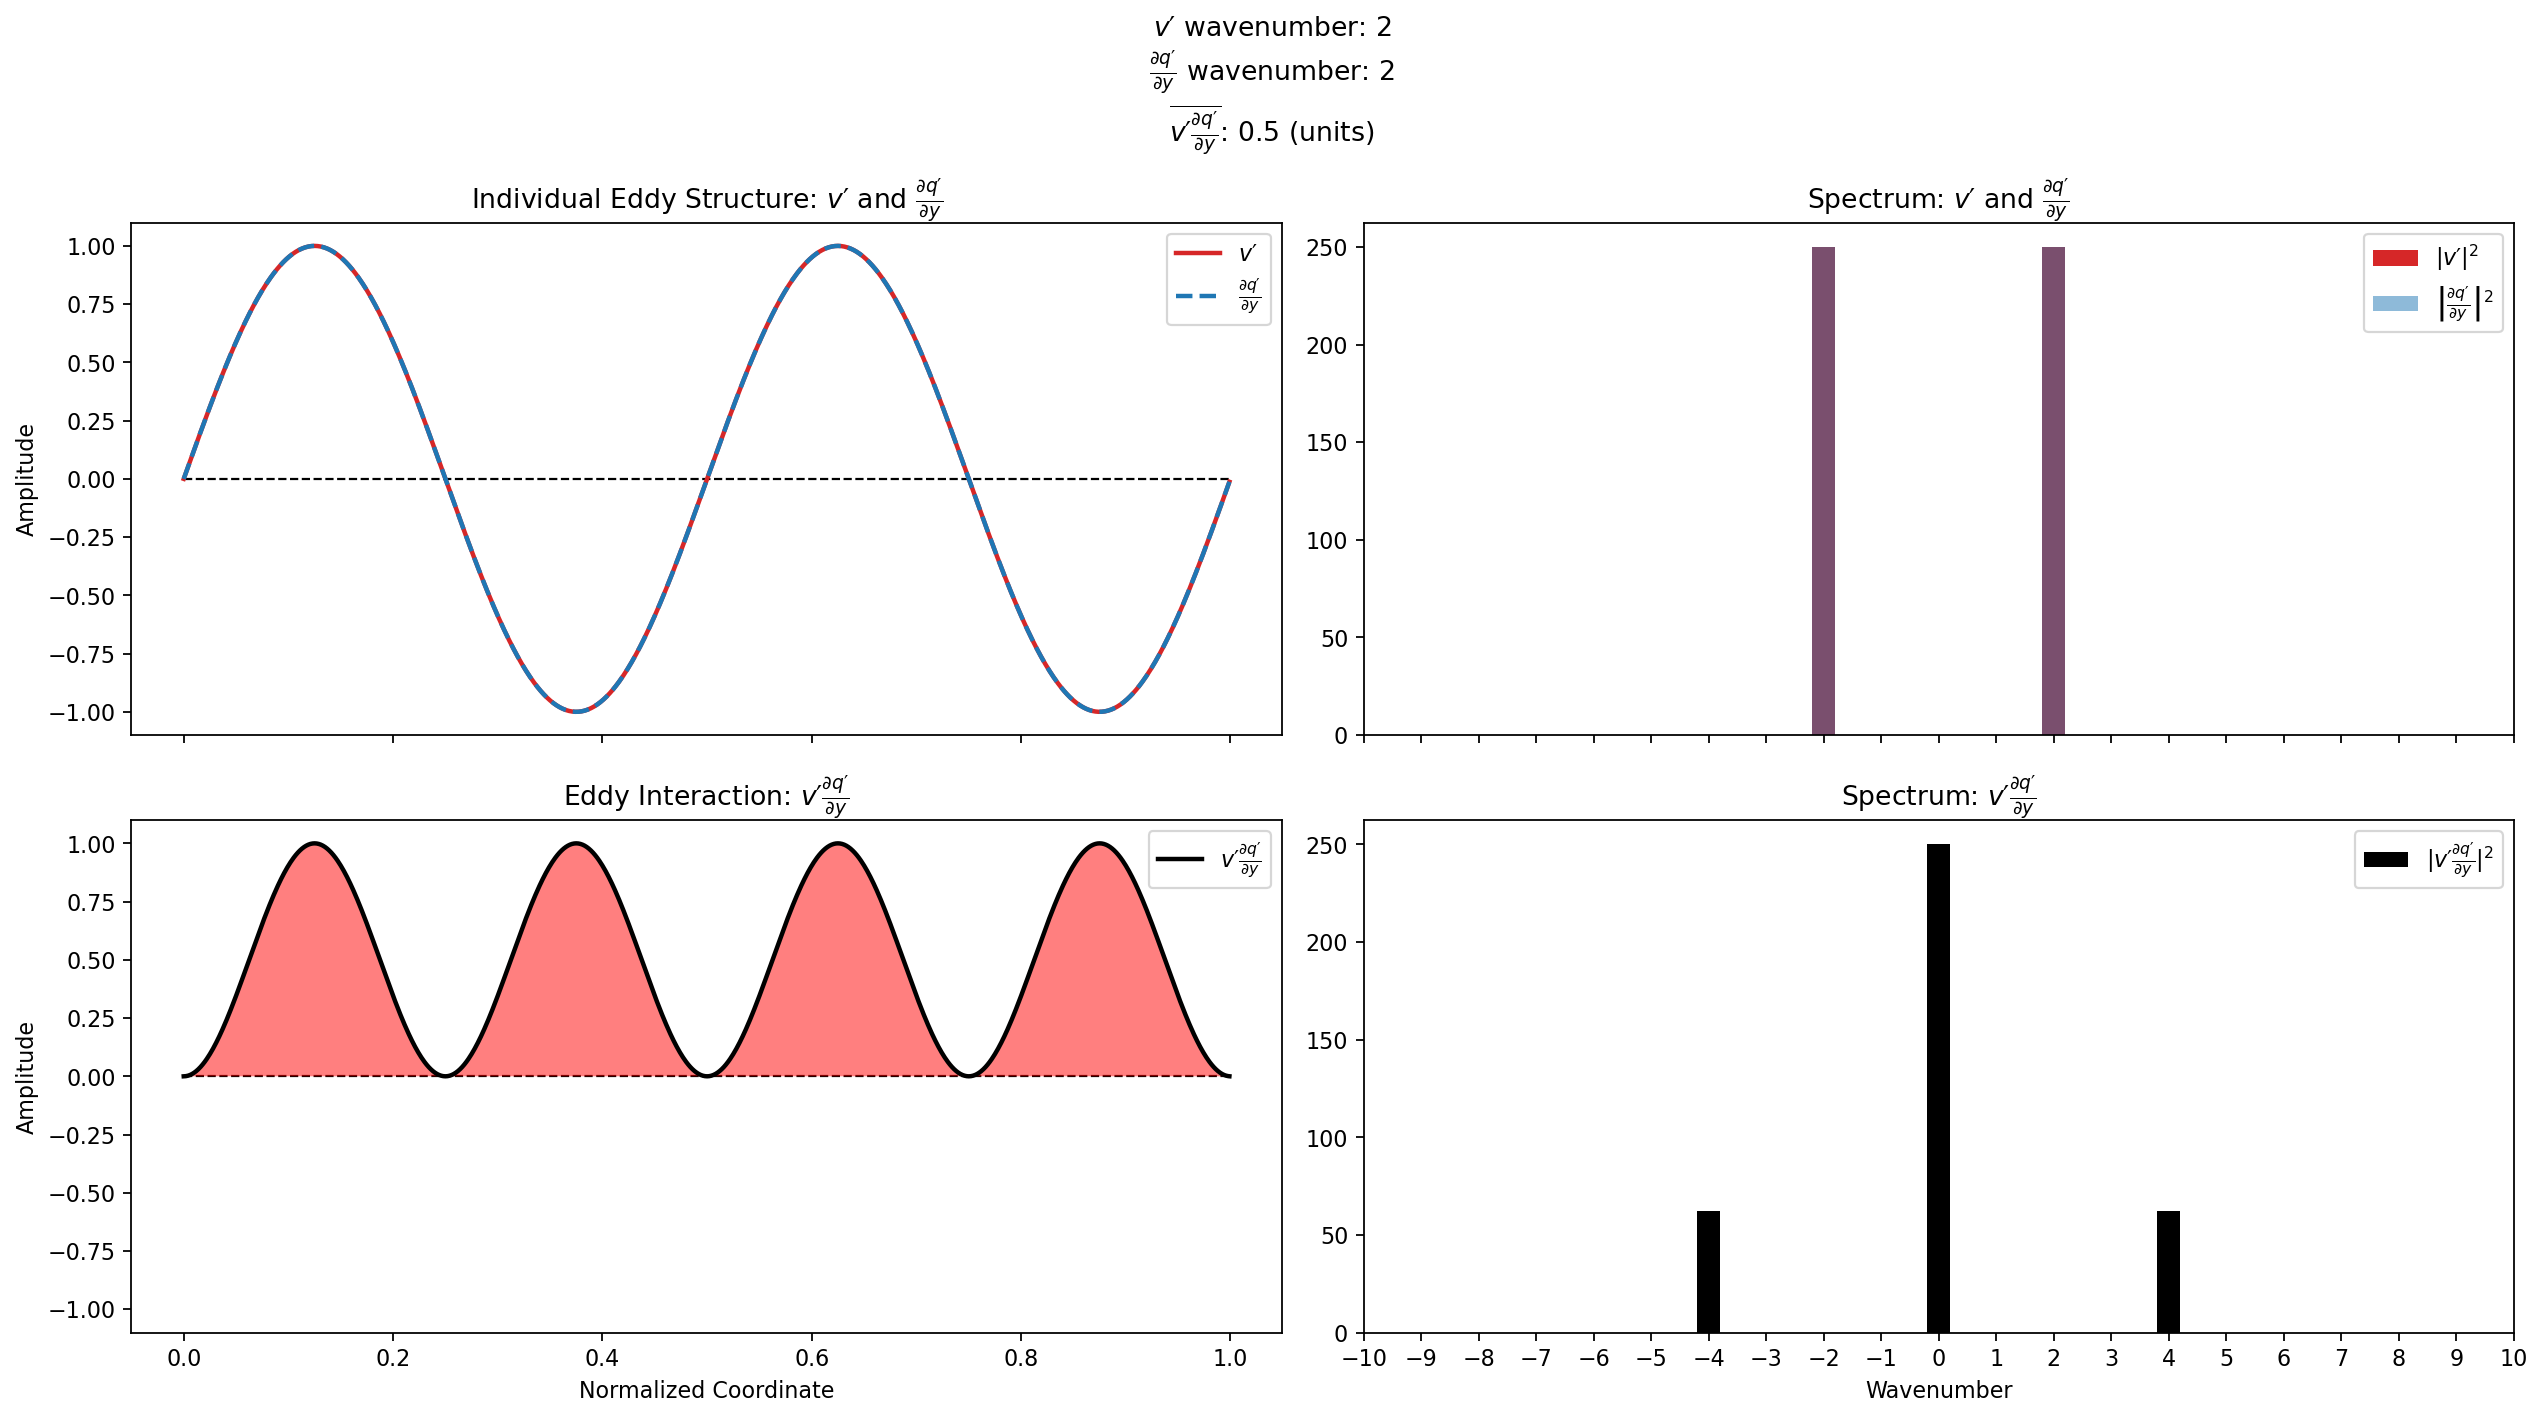

In [14]:
# Eddy contributions from same wavenumbers contribute to the budget.
k1 = 2
k2 = 2
display_eddy_contribution_under_zonal_mean(
    velocity_wavenumber=k1, quantity_gradient_wavenumber=k2
)
display_eddy_structure(velocity_wavenumber=k1, quantity_gradient_wavenumber=k2)